In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import metrics
#pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize'] = (15,5)

#Viewing Summary() (Logistic Regression)
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [2]:
raw_data = pd.read_csv('Data/Auto model.csv')

In [3]:
# the independent variables set 
X = raw_data[['MPG','Cylinders']]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

     feature       VIF
0        MPG  3.268683
1  Cylinders  3.268683


In [4]:
x1 = raw_data[['MPG','Cylinders']]
y = raw_data['GallonsPer100Miles']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GallonsPer100Miles   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1942.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          3.62e-203
Time:                        19:27:05   Log-Likelihood:                -286.70
No. Observations:                 392   AIC:                             579.4
Df Residuals:                     389   BIC:                             591.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8669      0.239     28.716      0.000       6.397       7.337
MPG           -0.1533      0.005    -29.472      0.000      -0.164      -0.143
Cylinders      0.2763      0.024     11.610      0.000       0.230       0.323
==============================================================================
Omnibus:                      179.404   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.381
Skew:                           1.786   Prob(JB):                    3.16e-287
Kurtosis:                      11.247   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#Predictions
inputs = x1.copy()
input = sm.add_constant(inputs)

In [6]:
pred = results.predict(input)

In [7]:
input['Predictions'] = pred
input['Targets'] = y
input['Residuals'] = input['Targets'] - input['Predictions']
input

,const,MPG,Cylinders,Predictions,Targets,Residuals
0,1.0,18.0,8,6.318125,5.6,-0.718125
1,1.0,15.0,8,6.778023,6.7,-0.078023
2,1.0,18.0,8,6.318125,5.6,-0.718125
3,1.0,16.0,8,6.624724,6.3,-0.324724
4,1.0,17.0,8,6.471424,5.9,-0.571424
...,...,...,...,...,...,...
387,1.0,27.0,4,3.833117,3.7,-0.133117
388,1.0,44.0,4,1.227025,2.3,1.072975
389,1.0,32.0,4,3.066619,3.1,0.033381
390,1.0,28.0,4,3.679817,3.6,-0.079817


In [8]:
results.params

const        6.866892
MPG         -0.153300
Cylinders    0.276328
dtype: float64

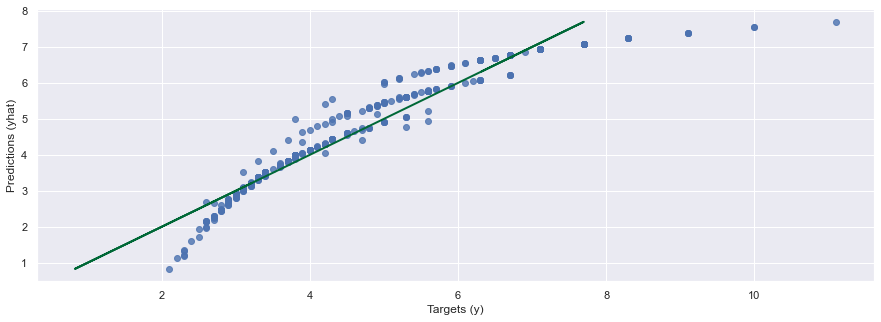

In [9]:
plt.scatter(input['Targets'], input['Predictions'], alpha = 0.8)
yhat = 6.8669 - 0.1533 * x['MPG'] + 0.2763 * x['Cylinders']
fig = plt.plot(input['Predictions'], yhat, lw=2, c='#006837')
plt.xlabel('Targets (y)')
plt.ylabel('Predictions (yhat)')
plt.show()

In [10]:
pred_table = input.copy()
pred_table['Residual (%)'] = pred_table['Residuals']/pred_table['Targets'] * 100
pd.options.display.max_rows = 300
pd.set_option('display.float_format',lambda x: '%.2f'%x)
pred_table

,const,MPG,Cylinders,Predictions,Targets,Residuals,Residual (%)
0,1.00,18.00,8,6.32,5.60,-0.72,-12.82
1,1.00,15.00,8,6.78,6.70,-0.08,-1.16
2,1.00,18.00,8,6.32,5.60,-0.72,-12.82
3,1.00,16.00,8,6.62,6.30,-0.32,-5.15
4,1.00,17.00,8,6.47,5.90,-0.57,-9.69
...,...,...,...,...,...,...,...
387,1.00,27.00,4,3.83,3.70,-0.13,-3.60
388,1.00,44.00,4,1.23,2.30,1.07,46.65
389,1.00,32.00,4,3.07,3.10,0.03,1.08
390,1.00,28.00,4,3.68,3.60,-0.08,-2.22


### Using Scikit

In [11]:
x1.head()

,MPG,Cylinders
0,18.00,8
1,15.00,8
2,18.00,8
3,16.00,8
4,17.00,8


### Standarding or Scaling our Data

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(x1)

StandardScaler()

In [14]:
input_scaled = scaler.transform(x1)

### Splitting Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, y, shuffle=True, random_state=21, test_size=0.2)

In [16]:
y_train.size

313

### Creating the Linear Regression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
sum_tab = pd.DataFrame(x1.columns.values, columns=['Features'])
sum_tab['Weights/Coefficients'] = reg.coef_
sum_tab['F-statistics'] = f_regression(x_train,y_train)[0].round(3)
sum_tab['P-Values'] = f_regression(x_train,y_train)[1].round(3)
sum_tab


,Features,Weights/Coefficients,F-statistics,P-Values
0,MPG,-1.20,2111.81,0.00
1,Cylinders,0.48,705.38,0.00


In [20]:
reg.intercept_

4.791383017036848

In [21]:
reg.score(x_train,y_train)

0.904611976599751

#### Adjusted R-squared
$R^2_{adj.} = 1 - (1 - R^2) / { n- 1} {n - p - 1}$

In [22]:
r2 = reg.score(x_train,y_train)
n = x.shape[0]
p = x.shape[1]

In [23]:
n

392

In [24]:
p

3

In [25]:
adj_r2 = 1 - (1 - r2) * (n -1)/(n-p-1)
adj_r2

0.903874440336347

In [26]:
y_test.size

79

#### Predictions And Testing

In [27]:
x_test, y_test
pred_table = pd.DataFrame(y_test)
pred_table = pred_table.reset_index(drop=True) # Resetting the indexes of the y_test data

In [29]:
pred = reg.predict(x_test)
x_test1 = pd.DataFrame(x_test)
pred_tab = x_test1.copy()
pred_tab['Predictions'] = pred
pred_tab = pred_tab.rename(columns={0:"MPG",1:"Cylinder"})
pred_tab.head()

,MPG,Cylinder,Predictions
0,0.71,-0.86,3.53
1,0.33,-0.86,3.99
2,-0.47,0.31,5.50
3,1.41,-0.86,2.70
4,-0.12,0.31,5.08


In [30]:
sum_tab

,Features,Weights/Coefficients,F-statistics,P-Values
0,MPG,-1.20,2111.81,0.00
1,Cylinders,0.48,705.38,0.00


In [31]:
reg.intercept_

4.791383017036848

In [32]:
reg.score(x_test,y_test)

0.9270303849853578

In [33]:
reg.score(x_test,y_test)

0.9270303849853578

In [34]:
adj_r2

0.903874440336347